In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as scio

%matplotlib inline 

Importing all the libraries

## 10 part 1

going to start by generating a dataset for which I know an approximate regression

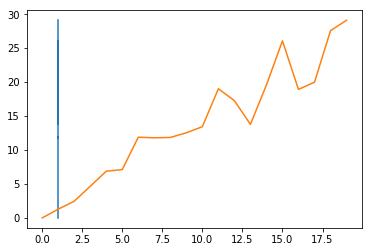

In [2]:

X_trn = []
for i in range(20):
    X_trn.append([1,i])
    

sp.random.seed(123)    
Y_trn = []
for i in range(len(X_trn)):
    Y_trn.append(X_trn[i][1] * (sp.rand(1) + 1))
    

    
plt.plot(X_trn, Y_trn)

In [3]:
def calcCFTheta(X,Y):
    inver = np.dot(X.T, X)
    xy = np.dot(X.T, Y)
    theta = np.dot(np.linalg.inv(inver), xy)
    
    
    return theta

In [4]:
def computeCost(X, Y, theta):
    
    cost = np.power(np.linalg.norm((X*theta - Y), 2))
    #print("cost: ", cost)
    return cost
    
    

In [5]:
def gradientDescent(X, Y, theta, lrnRate, ittr):
    #print(X, Y, theta, lrnRate)
    
    m = len(Y)
    costs = [0] * ittr
    
    for i in range(ittr):
        theta = theta - (lrnRate/m) * (X.T * (X * theta - Y))
        #print(theta)
    
    return theta

In [6]:
m = len(X_trn)  # number of training samples (should be 20)
itterations = 2000
lrnRate = 0.01
X = np.mat(X_trn)
Y = np.mat(Y_trn)
theta1 = np.mat('[0;0]')

theta1 = gradientDescent(X, Y, theta1, lrnRate, itterations)
theta2 = calcCFTheta(X,Y)

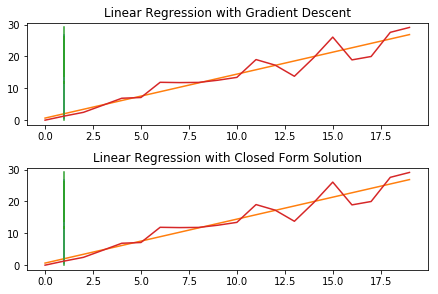

In [7]:
plt.subplot(2,1,1)
plt.title('Linear Regression with Gradient Descent')
plt.plot(X_trn, X_trn * theta1)
plt.plot(X_trn, Y_trn)

plt.subplot(2,1,2)
plt.title('Linear Regression with Closed Form Solution')
plt.plot(X_trn, X_trn * theta2)
plt.plot(X_trn, Y_trn)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## 10 part 2

In [8]:
mat = scio.loadmat('HW1_Data/dataset1.mat')

X_trn = mat['X_trn']
Y_trn = mat['Y_trn']
X_tst = mat['X_tst']
Y_tst = mat['Y_tst']
data = [X_trn,Y_trn,X_tst,Y_tst]

In [9]:
print('shape of the data is [%d, %d]' % X_trn.shape)

shape of the data is [120, 1]


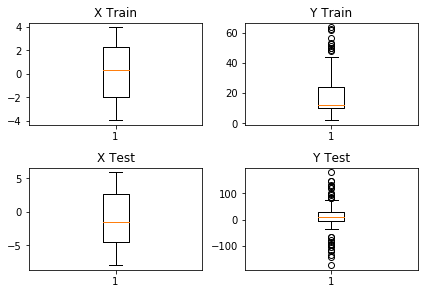

In [12]:
data_labels = ['X Train', 'Y Train', 'X Test', 'Y Test']

for x in range(4):
    plt.subplot(2,2,x +1)
    plt.boxplot(data[x])
    plt.title(data_labels[x])
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [13]:
m = len(X_trn)
itterations = 2000
lrnRate = 0.01
X = np.mat(X_trn)
Y = np.mat(Y_trn)
theta1 = np.mat('[0]')

theta1 = gradientDescent(X, Y, theta1, lrnRate, itterations)
theta2 = calcCFTheta(X,Y)

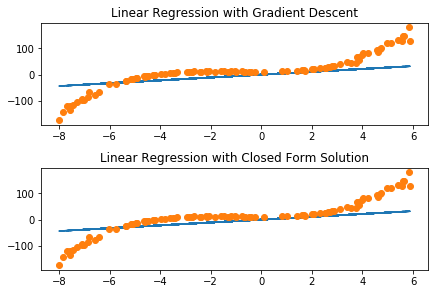

In [19]:
plt.subplot(2,1,1)
plt.title('Linear Regression with Gradient Descent')
plt.plot(X_tst, X_tst * theta1)
plt.plot(X_tst, Y_tst, 'o')

plt.subplot(2,1,2)
plt.title('Linear Regression with Closed Form Solution')
plt.plot(X_tst, X_tst * theta2)
plt.plot(X_tst, Y_tst, 'o')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)